In [1]:
import matplotlib.pyplot as plt
import json

In [2]:
def plot_train_map(
        train_dataset: str, 
        figsize: tuple[int, int] = (20, 10), 
        show_station_name: bool = True, 
        name_size: int = 4
) -> plt.Figure:
    file_obj = open(train_dataset, "r")
    json_dataset = json.load(file_obj)
    colors = ["black", "grey", "brown", "red", "green", "pink", "blue", "magenta", "olive", "navy", "darkblue", "teal", "lime",
          "darkorange", "darkred", "salmon", "peru", "orangered", "saddlebrown", "lightseagreen", "coral", "sienna", "chocolate",
          "peachpuff", "burlywood", "darkkhaki", "olivedrab", "lawngreen", "lightgreen", "gold", "khaki", "slateblue", "mediumpurple",
          "purple", "royalblue", "violet"]    
    cmap = {line: c for line, c in zip(json_dataset, colors)}
    
    fig, ax = plt.subplots(figsize=figsize)

    for line_name in json_dataset:
        line_data = json_dataset[line_name]
        station_names = list(line_data.keys())
        prev_station_name = station_names[0]
        x, y = line_data[prev_station_name]["x"], line_data[prev_station_name]["y"]
        ax.scatter(x, y, c=cmap[line_name])
        if show_station_name:
            ax.annotate(prev_station_name, (x, y), size=name_size)

        for station_name in station_names[1:]:
            x, y = line_data[station_name]["x"], line_data[station_name]["y"]
            prev_x, prev_y = line_data[prev_station_name]["x"], line_data[prev_station_name]["y"]
            ax.scatter(x, y, c=cmap[line_name])
            ax.plot((x, prev_x), (y, prev_y), c = cmap[line_name])

            if show_station_name:
                ax.annotate(station_name, (x, y), size=name_size)
            prev_station_name = station_name

    return fig

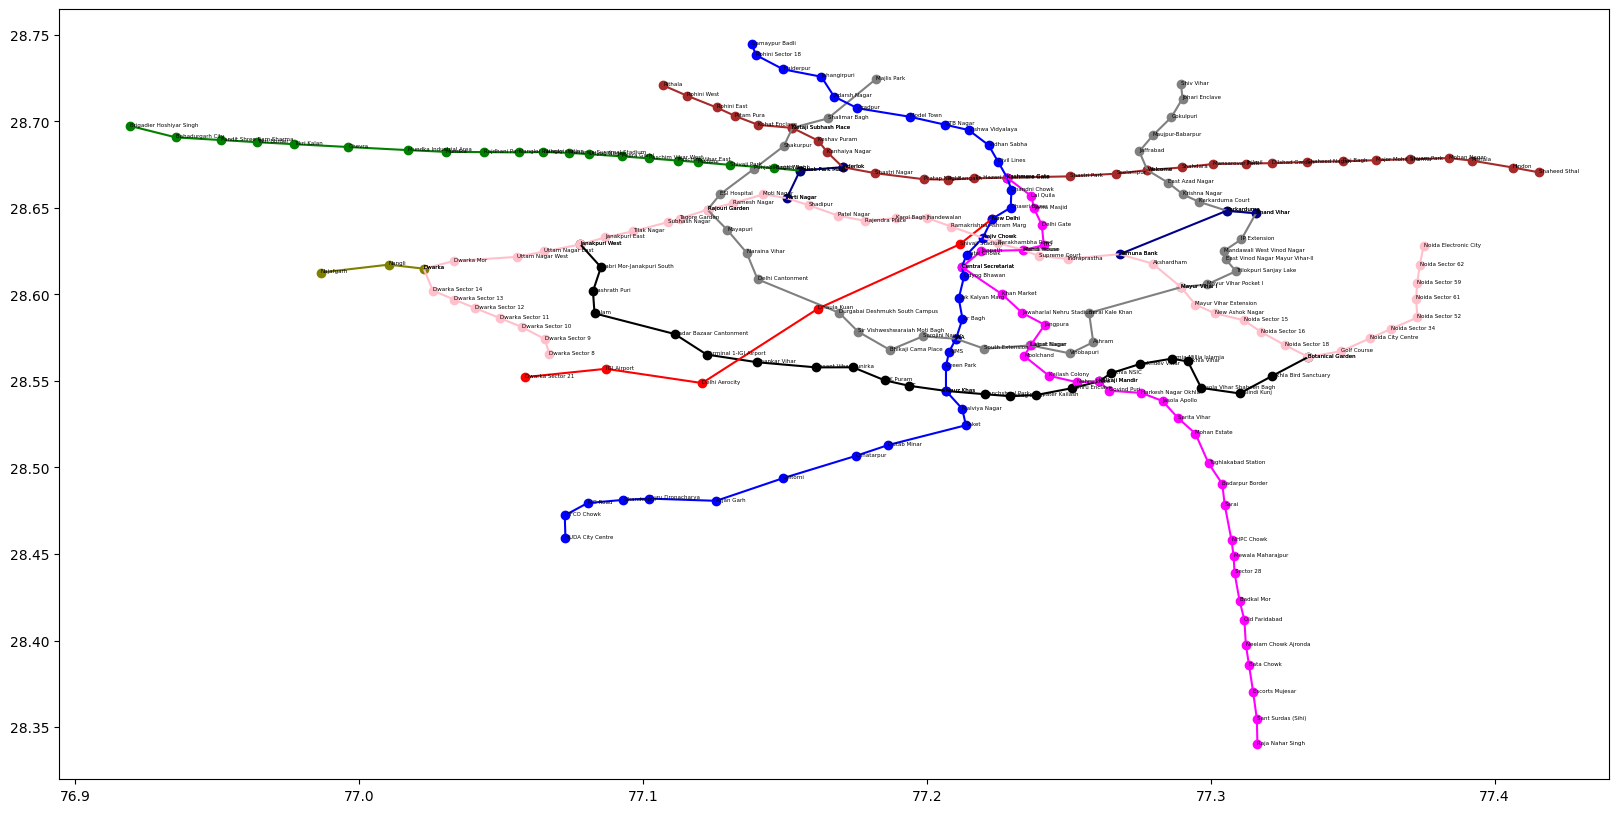

In [3]:
delhi_graph = plot_train_map("final-json-datasets/delhi.json")
delhi_graph.savefig("visualizations/delhi.png")

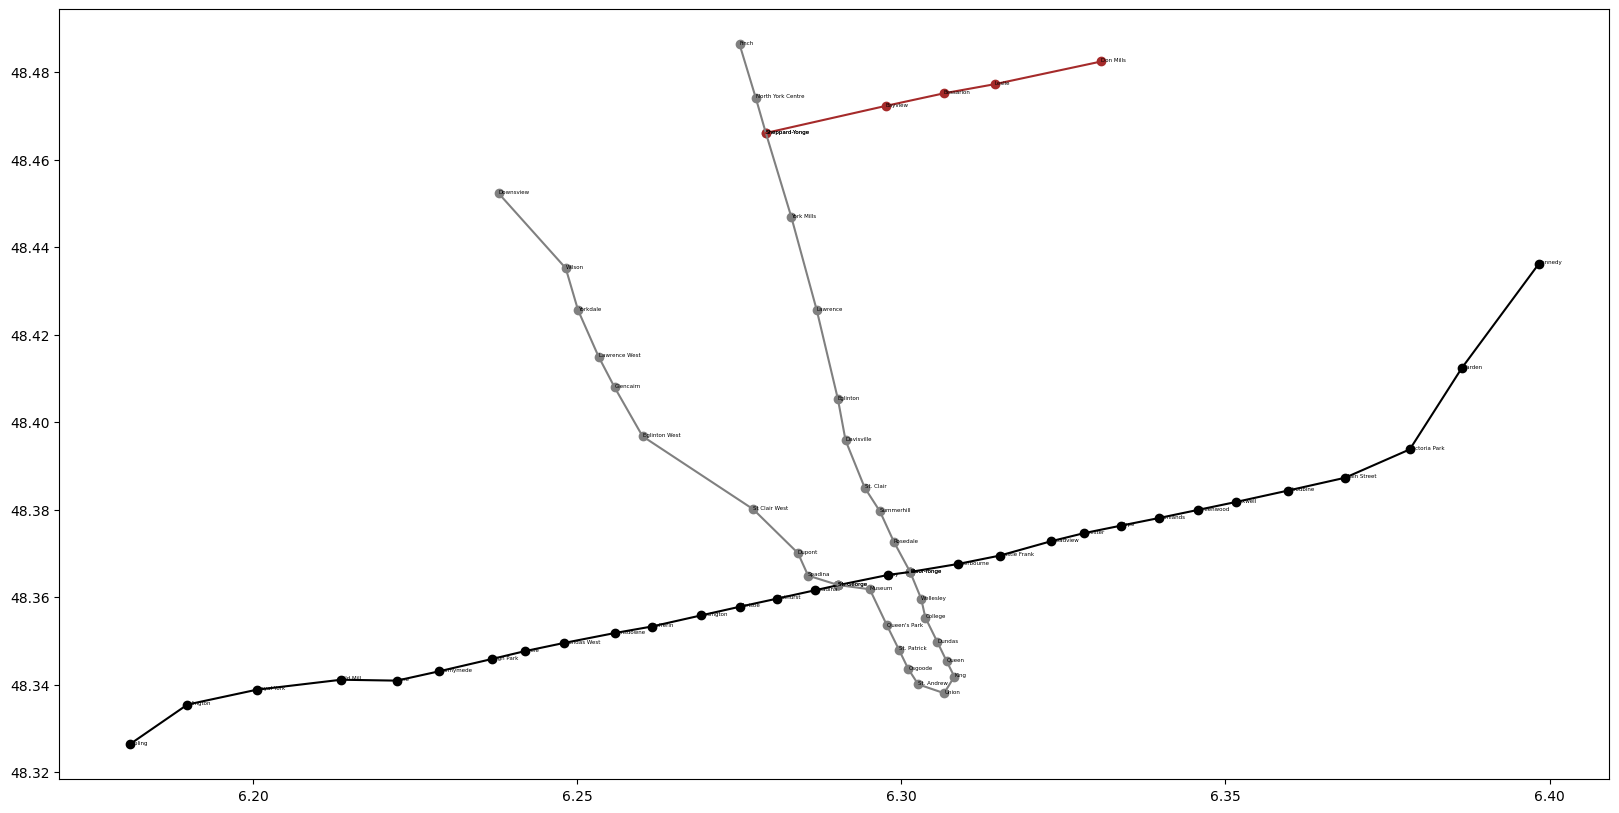

In [4]:
toronto_graph = plot_train_map("final-json-datasets/toronto.json")
toronto_graph.savefig("visualizations/toronto.png")

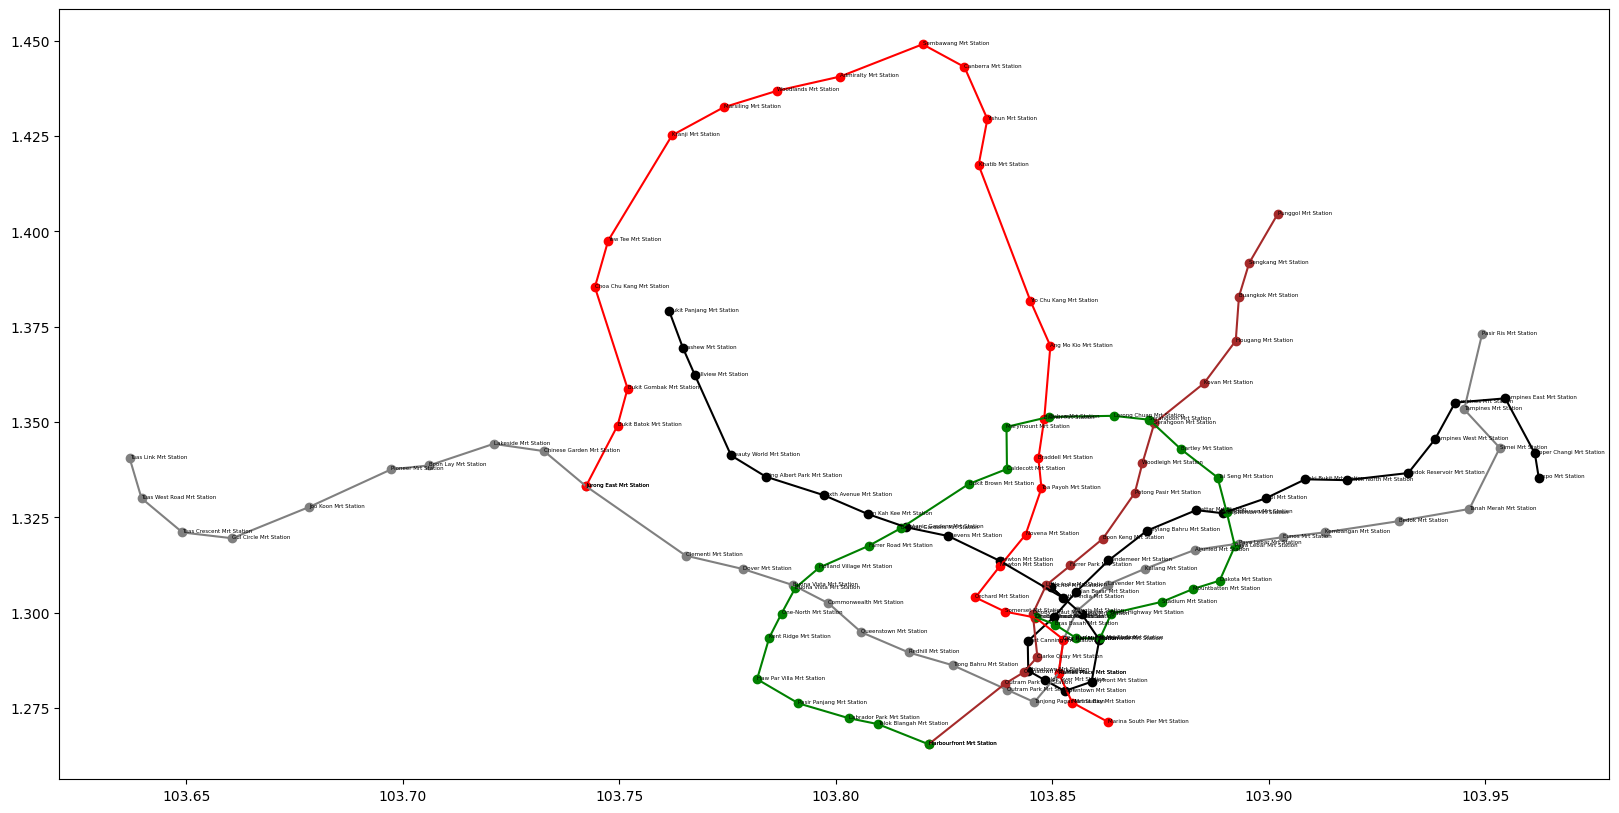

In [5]:
singapore_graph = plot_train_map("final-json-datasets/singapore.json")
singapore_graph.savefig("visualizations/singapore.png")

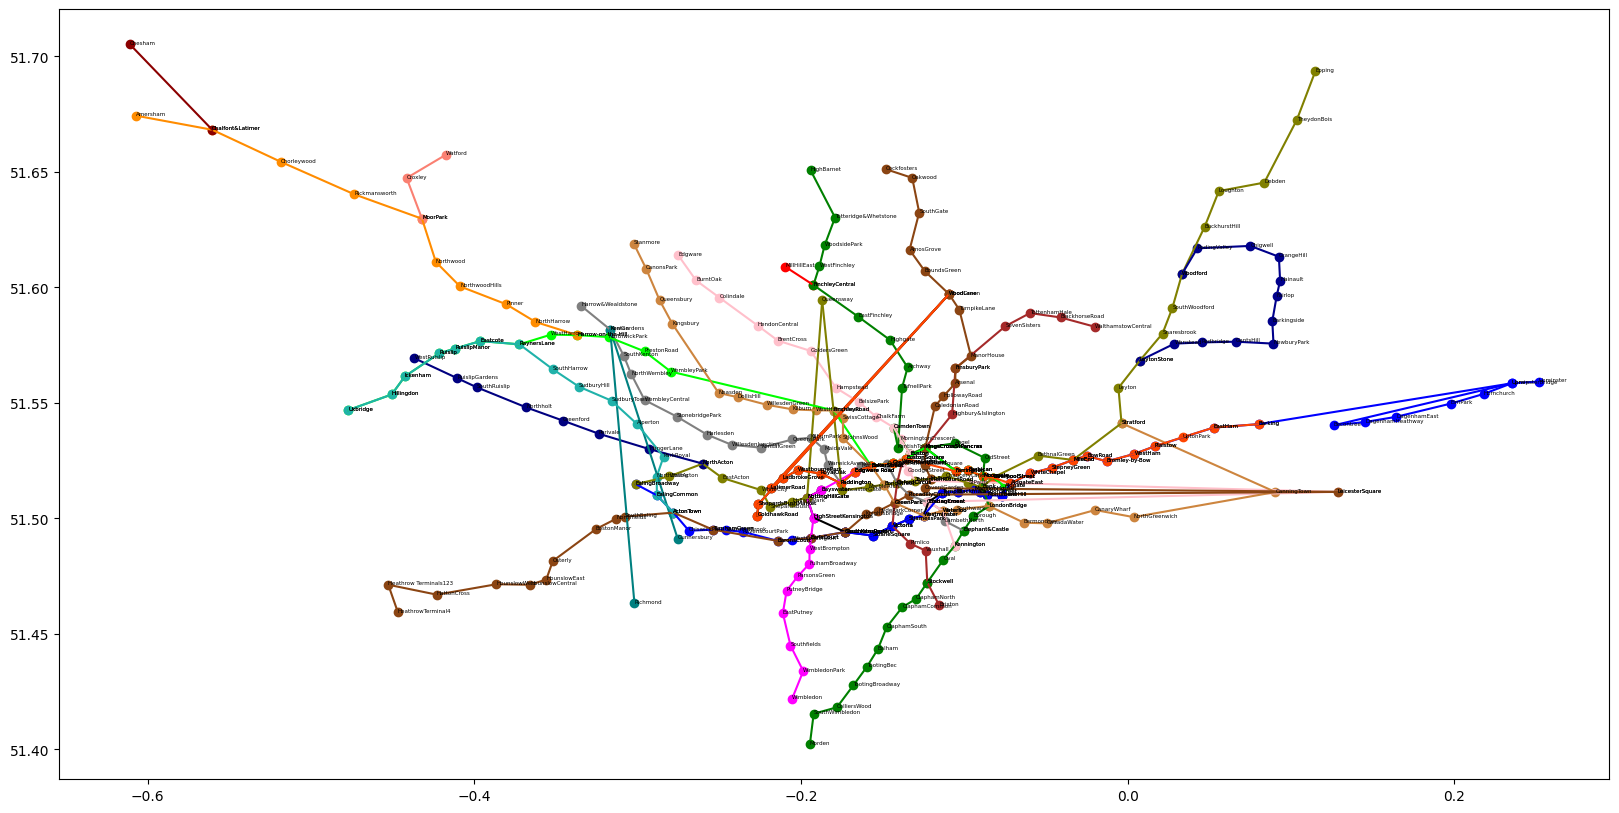

In [20]:
london_graph = plot_train_map("final-json-datasets/london.json")
london_graph.savefig("visualizations/london.png")

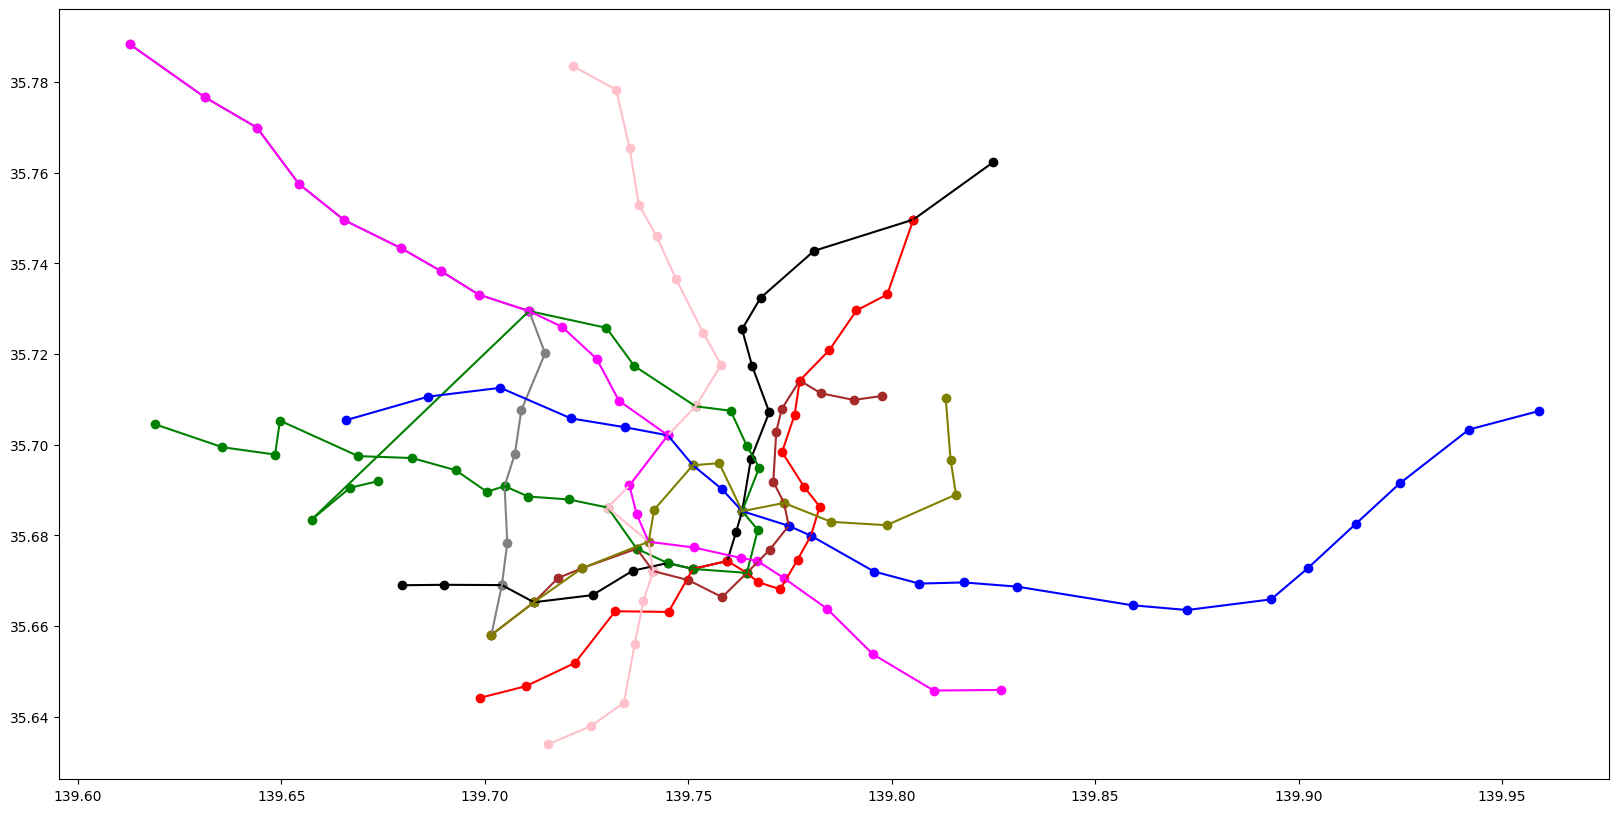

In [10]:
tokyo_graph = plot_train_map("final-json-datasets/tokyo.json", show_station_name=False)
tokyo_graph.savefig("visualizations/tokyo.png")

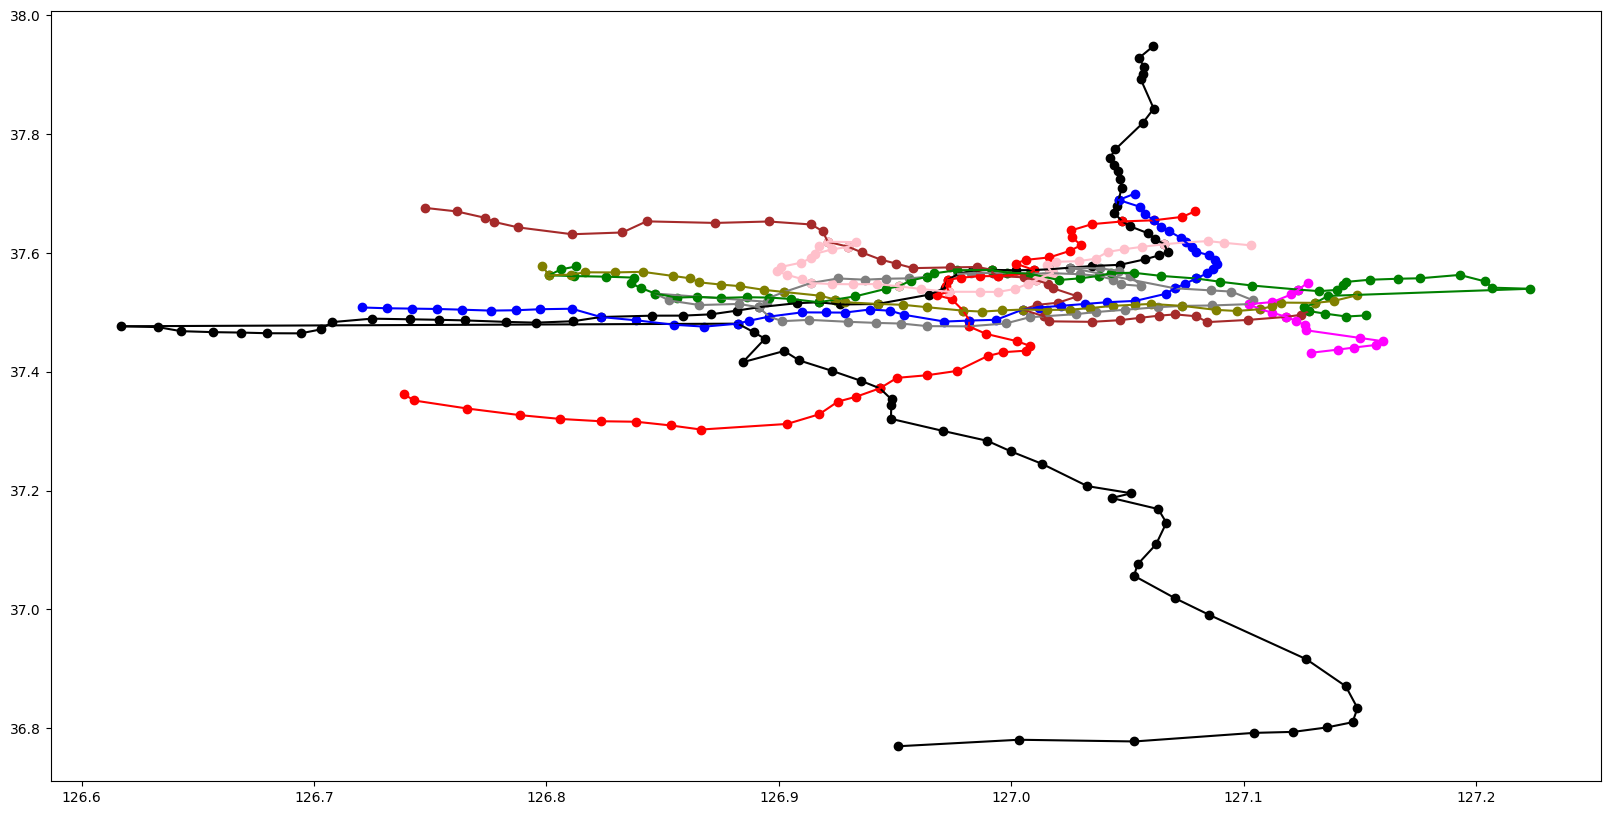

In [23]:
seoul_graph = plot_train_map("final-json-datasets/seoul.json", show_station_name=False)
seoul_graph.savefig("visualizations/seoul.png")